In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tabular_simple import TabularSimple
from generator import Generator
from discriminator import Discriminator
from rollout_max_ent import ROLLOUT
import tensorflow as tf

/zhome/30/0/70339/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/zhome/30/0/70339/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/zhome/30/0/70339/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/zhome/30/0/70339/.local/lib/python3.6/site-packages/tensorflow/python/frame

In [3]:
n_modes = 2
n_vocabulary = 4
vocab = range(n_vocabulary)
tabular_model = TabularSimple(4,n_vocabulary,n_modes)

<BarContainer object of 4 artists>

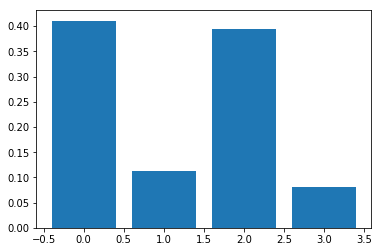

In [4]:
dist = tabular_model.table["10"]
plt.bar(vocab, dist)

In [5]:
size = 10000
samples = tabular_model.sample(size)

In [6]:
np.savetxt('save/real_data_tab.txt',samples,fmt='%d',delimiter=' ')

In [7]:
len(list(tabular_model.table.keys()))

85

In [8]:
tabular_model.ll(samples)

-1.2067443636160797

In [9]:
TabularSimple(4,n_vocabulary,n_modes).ll(samples)

-1.2067443636160797

In [10]:
#########################################################################################
#  Generator  Hyper-parameters
######################################################################################
EMB_DIM = 4 # embedding dimension
HIDDEN_DIM = 4 # hidden state dimension of lstm cell
SEQ_LENGTH = 4 # sequence length
START_TOKEN = 0
PRE_EPOCH_NUM = 120 # supervise (maximum likelihood estimation) epochs
SEED = 88
BATCH_SIZE = 64
vocab_size = 4

#########################################################################################
#  Discriminator  Hyper-parameters
#########################################################################################
dis_embedding_dim = 2
dis_filter_sizes = [1, 2, 3, 4]
#dis_num_filters = [200, 200, 200, 200]
dis_num_filters = [10, 10, 10, 10]
dis_dropout_keep_prob = 0.75
dis_l2_reg_lambda = 0.2
dis_batch_size = 64

#########################################################################################
#  Basic Training Parameters
#########################################################################################
TOTAL_BATCH = 200
#positive_file = 'save/real_data_tab.txt'
#negative_file = 'save/generator_sample_tab.txt'
#eval_file = 'save/eval_file_tab.txt'
generated_num = 10000

generator = Generator(vocab_size, BATCH_SIZE, EMB_DIM, HIDDEN_DIM, SEQ_LENGTH, START_TOKEN)

discriminator = Discriminator(sequence_length=20, num_classes=2, vocab_size=vocab_size, embedding_size=dis_embedding_dim, 
                            filter_sizes=dis_filter_sizes, num_filters=dis_num_filters, l2_reg_lambda=dis_l2_reg_lambda)
rollout = ROLLOUT(generator, 0.8)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.random.categorical instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [11]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [12]:
# run from saved checkpoint 
saver = tf.train.Saver()
tf.reset_default_graph()
saver.restore(sess, 'model/advtrain_max_ent_tab.ckpt')
#saver.restore(sess, 'model/advtrain.ckpt')

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from model/advtrain_max_ent_tab.ckpt


In [13]:
generator.batch_size

64

In [14]:
x_t = tf.nn.embedding_lookup(generator.g_embeddings, [10]*64)
h_tm1 = generator.h0
h_t = generator.g_recurrent_unit(x_t, h_tm1)  # hidden_memory_tuple
o_t = generator.g_output_unit(h_t)  # batch x vocab , logits not prob
#log_prob = tf.log(tf.nn.softmax(o_t))
dist0 = sess.run(tf.nn.softmax(o_t))[0,:]

<BarContainer object of 4 artists>

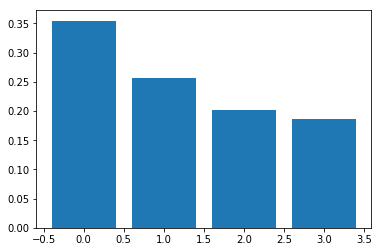

In [15]:
plt.bar(vocab, dist0)

<BarContainer object of 4 artists>

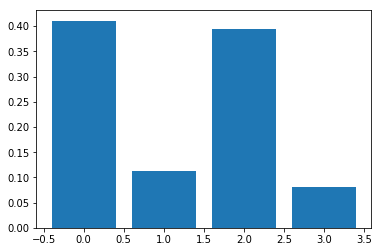

In [16]:
plt.bar(vocab,tabular_model.table["10"])

In [17]:
#calculate cross entropy
table = {"": log(1)}
for _ in range(tabular_model.seq_length - 1 ):
    new_dict = {}
    for key in table:
        for i in self.vocab:
            dist = table[key + str(i)]
            new_dict[key + str(i)] = tabular_model._create_dist(n_vocabulary,n_modes)
    table.update(new_dict)

NameError: name 'log' is not defined